### DM-07 Assignment 1  

#### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('cancer.csv', delimiter=',', skiprows=14, header=0)
print(df.shape)
print(df.info())
display(df.head())

(569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       569 non-null    int64  
 1   Diag     569 non-null    object 
 2   ave_a    569 non-null    float64
 3   ave_b    569 non-null    float64
 4   ave_c    569 non-null    float64
 5   ave_d    569 non-null    float64
 6   ave_e    569 non-null    float64
 7   ave_f    569 non-null    float64
 8   ave_g    569 non-null    float64
 9   ave_h    569 non-null    float64
 10  ave_i    569 non-null    float64
 11  ave_j    569 non-null    float64
 12  se_a     569 non-null    float64
 13  se_b     569 non-null    float64
 14  se_c     569 non-null    float64
 15  se_d     569 non-null    float64
 16  se_e     569 non-null    float64
 17  se_f     569 non-null    float64
 18  se_g     569 non-null    float64
 19  se_h     569 non-null    float64
 20  se_i     569 non-null    float64
 21  se_j  

,ID,Diag,ave_a,ave_b,ave_c,ave_d,ave_e,ave_f,ave_g,ave_h,...,worst_a,worst_b,worst_c,worst_d,worst_e,worst_f,worst_g,worst_h,worst_i,worst_j
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
print(df[ df['Diag']=='M' ].shape, df[ df['Diag']=='B' ].shape)

(212, 32) (357, 32)


In [4]:

dfX = df.loc[:, 'ave_a':]
print(dfX.shape)
display(dfX.head())

(569, 30)


,ave_a,ave_b,ave_c,ave_d,ave_e,ave_f,ave_g,ave_h,ave_i,ave_j,...,worst_a,worst_b,worst_c,worst_d,worst_e,worst_f,worst_g,worst_h,worst_i,worst_j
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
sc = StandardScaler()
X_std = sc.fit_transform(dfX)

In [6]:
n_pca = 7
pca = PCA(n_components=n_pca)
X_pca = pca.fit_transform(X_std)

In [7]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953 ]


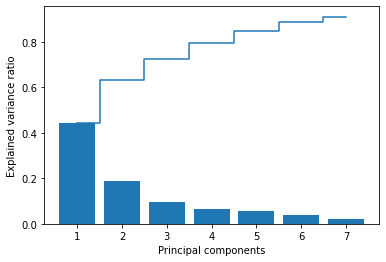

In [8]:
xx = range(1, n_pca+1)
plt.bar(xx, pca.explained_variance_ratio_)
plt.step(xx, np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

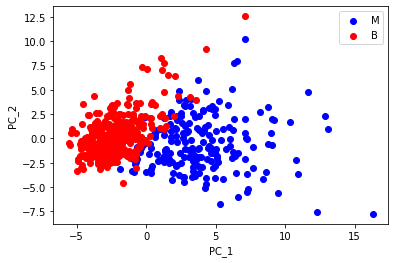

In [9]:
ser_class = df['Diag']
pca_x = X_pca[:, 0]
pca_y = X_pca[:, 1]
classes = ser_class.unique()
colors = ['blue', 'red']
for i in range(len(classes)):
    cls = classes[i]
    c = colors[i]
    plt.scatter(pca_x[ser_class==cls], pca_y[ser_class==cls],
                c=c, label=cls)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.legend()
plt.show()

ave_a 7.004878198400925 -7.483428215822085
ave_b 3.319186502904232 -1.91059482553908
ave_c 7.281193376181024 -6.885803564596016
ave_d 7.071839532355187 -7.394454761188451
ave_e 4.562870219521579 5.955616725578422
ave_f 7.65713132649378 4.860531522542444
ave_g 8.268815399961305 1.9252916095213781
ave_h 8.34732026834476 -1.112560015940679
ave_i 4.421342697718552 6.09116065188597
ave_j 2.05962708389998 11.730415083993583
se_a 6.591320827363127 -3.377668858307674
se_b 0.5576969007674082 2.879349818450114
se_c 6.7624293240134685 -2.862631494881095
se_d 6.491828334132371 -4.873364099619973
se_e 0.46500646872624857 6.541774497101953
se_f 5.452590438644279 7.4469086777953954
se_g 4.914873271672176 6.310633046827914
se_h 5.8693567028529685 4.170289917032908
se_i 1.359949492258704 5.883135998220787
se_j 3.2821863070562576 8.962944851698532
worst_a 7.295892295435057 -7.035724137531411
worst_b 3.343018414628272 -1.4549535443857526
worst_c 7.572469783728604 -6.39610969400067
worst_d 7.1958570474949

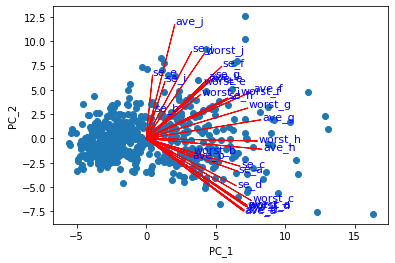

In [11]:
def biplot(X_2d, coef_2d, coef_labels=None):
    r1 = 32
    r2 = 1.01
    coef_2dT = coef_2d.T
    if coef_labels is None:
        coef_labels = range(len(coef_2dT))
    for i, coef in enumerate(coef_2dT):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, coef_labels[i],
                 color='b', fontsize=11)
        print(coef_labels[i], coef[0]*r1, coef[1]*r1)
    plt.scatter(X_2d[:,0], X_2d[:,1])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    return None

biplot(X_pca[:, :2], pca.components_[:2], coef_labels=dfX.columns)